# Assignment 1: Programming Assignment (20 marks)

Student Name: `Stone Liu`

Student ID: 

## General info

<b>Due date</b>: Friday, 12 April 2024 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2.0;</li>
    <li>two days late, -4.0;</li>
    <li>three days late, -6.0;</li>
    <li>four days late, -8.0;</li>
    <li>five days late, -10.0;</li>
</ul>

<b>Marks</b>:  This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page] on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages `numpy`, `pandas`, `matplotlib` and `sklearn`. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions. 


<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on Canvas>Assignments>Assignmnet1; we recommend you check it regularly.

<b>Academic misconduct</b>: This assignment is an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place. Content produced by an AI (including, but not limited to ChatGPT) is not your own work, and submitting such content will be treated as a case of academic misconduct, in line with the <a href="https://academicintegrity.unimelb.edu.au/plagiarism-and-collusion/artificial-intelligence-tools-and-technologies"> University's policy</a>.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions: 
<UL TYPE=”square”>
<LI>Missing Authorship Declaration at the bottom of the page, **-1.0**
<LI>Incomplete or unsigned Authorship Declaration at the bottom of the page, **-0.5**
</UL>


## Overview:
For this assignment, you will apply a number of classifiers on a given dataset, and
explore various evaluation paradigms and analyze the impact of multiple parameters on the performance of the classifiers. You will then answer a number of conceptual questions about the Naive Bayes classifier, K-nearest neighbors, and Decision Tree and a number of baselines based on your observations.

## Data Sets:
In this assignment, you will work with the following dataset., which is adapted from Spotify website:

 - **Spotify**: You predict the genre of a Spotify track, based on various audio features and meta data information such as Artists and Album Name. More information can be found on the given README file.


 
Here we have imported some of the modules and libraries that you might need to use. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from collections import defaultdict, Counter

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [4]:
# ignore warnings 
pd.options.mode.chained_assignment = None # default='warn'

## Question 1. Reading and Pre-processing [2.5 marks] 

First, we read in the data into a pandas DataFrame.

**A)** Print the first 3 rows of the DataFrame.

**B)** Replace missing values denoted by `?` with a value using the **most suitable** data imputation methodology given the nature of given data. **[1.25 marks]** Please provide justification for your chosen methodology. **[0.75 marks]**

**NOTE:** *There are multiple methods for performing data imputation. It is crucial to select the most appropriate method for each feature in this dataset and justify the selection. Different methods may be used for different features.*  


*Your Justification Here*

We can use these following way to replace the missing values denoted by '?'

For **continuos or numeric** attributes, we can usually fill it with the **mean or median (average feature value)** when here is not a lot of missing data. The reason for utilizing these imputation methods is that they are capable of preserving the original distribution of the data, are more robust to outliers within the data, and are suitable for randomly missing values. Particularly, if the assumption is made that data are missing randomly, using the average value as the method of imputation is judicious, as it does not introduce a significant bias into the distribution of the data.

For **categorical or nominal features** attributes, we can use the **most frequent value** to replace them. This method are chosen for their ability to preserve the dataset's original pattern, minimize distortion in overall distribution, and offer robustness against outliers. Particularly for randomly missing data, using the mode for imputation is both sensible and unlikely to introduce significant bias into the data distribution.

In [5]:
df = pd.read_csv('Spotify.csv') 

## your code here
## a) print first 3 rows
# print(df.head(3))

## b) replace missing
# discrete attributes
nom_attri = ['artists', 'album_name', 'track_name', 'explicit', 'key', 'mode', 'time_signature']
# continuous attributes
num_attri = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# find the most frequent value for a attribute
def get_most_freq_value(attri):
    counts = df[attri].value_counts()
    max_freq_value = counts.index[0]
    # if "?" is the most frequent value 
    if max_freq_value == "?":
        max_freq_value = counts.index[1]
    return max_freq_value

# get the average value for an attribute
def get_avg_value( attri):
    if attri in num_attri:
        df[attri] = pd.to_numeric(df[attri].replace("?", np.nan))
        avg_value = df[attri].mean()
    return avg_value; 

# replace the missing data
for attri in df.columns[:-1]:
    if attri in nom_attri:
        max_freq_value = get_most_freq_value(attri)
        df[attri] = df[attri].replace("?", max_freq_value)
    if attri in num_attri:
        avg_value = get_avg_value(attri)
        df[attri] = df[attri].replace(np.nan,avg_value)

    



In [62]:
### print the missing values for debug

# rows_with_question_mark = df[df['artists'] == '?']
# print(rows_with_question_mark)
# print(df.value_counts(subset="popularity"))
# contains_question_mark = (df == "?").any().any()

# if contains_question_mark:
#     print("The DataFrame contains '?' data.")
# else:
#     print("No '?' data found in the DataFrame.")


# # 找出包含"?"的列 
# columns_with_question_mark = df.columns[df.isin(["?"]).any()]

# print("Columns with '?' data:", list(columns_with_question_mark))


No '?' data found in the DataFrame.
Columns with '?' data: []


**C)** We used `train_test_split` to divide the processed `df` into 80% train, 20% test. Use the splitted datasets to train and test the Zero-R baseline model and report the accuracy. **[0.25 marks]** Provide an explanation for your results. **[0.25 marks]**

In [49]:
X = df[df.columns.difference(['track_genre'])]
y = df['track_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y) 

## your code here

### method 1
#find the most common class in train dateset
most_common_class = y_train.mode()[0]
#use the common class to set a prediction result 
y_pred_zero_r = [most_common_class] * len(y_test)
#calculate the accuracy 
ZeroR_Acc = accuracy_score(y_test, y_pred_zero_r)

###methond 2
## use the dummy classifier of sklearn to find the most common class
zero_r_classifier = DummyClassifier(strategy='most_frequent')
# use the train dataset to fit the model
zero_r_classifier.fit(X_train, y_train)
# use the model to predict
y_pred = zero_r_classifier.predict(X_test)
#calculate the accuracy
ZeroR_Acc2 = accuracy_score(y_test, y_pred)

##########
print("Accuracy of the basement:", round(ZeroR_Acc, 3))
print("Accuracy of the basement:", round(ZeroR_Acc2, 3))
# print("Accuracy of the basement", ZeroR_Acc.round(3))

Accuracy of the baseline: 0.071
Accuracy of the baseline: 0.071


**Explanation:**
The Zero-R baseline model disregards all features and predicts based solely on the most frequently occurring class in the training data. Consequently, under this model, all test samples are predicted to belong to the most frequent label observed in the training data.

In the method 1, I first **calculates the most common class** in the training set.

In the method 2, I used the **DummyClassifier of sklearn** to build a model which will find the most common class.

## Question 2. Naive Bayes models [6.5 marks]

In this part you need to use two Naive Bayes models "Gaussian Naive Bayes" and "Multinominal Naive Bayes". For both these models you need to deal with the three features that are not numeric (`artists`, `album_name` and `track_name`). We are going to run TWO experiments. For each experiment you need to Divide the `df` into 80% train and 20% test splits, using the stratification strategy. Set the `random_state` equal to `90049` and shuffle argumnet equal to `True`. Then, train and test for both models. Report the accuracy of your models.

### Experiment 1. 

**A)** Remove the the features `artists`, `album_name` and `track_name` and use the other features to train and test the two Naive Bayes Model. Report the performance of the two models. **[1.5 marks]** 

**NOTE:** *You will need to find a solution to appropriately fix the issue of negative values for the "Multinominal Naive Bayes" model. Explain and justify the method you have used.*



In [86]:

## your code here
# remove three attributes
X = df[df.columns.difference(['artists', 'album_name', 'track_name', 'track_genre'])]
y = df['track_genre']

# divide dataset to train and test 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)

##GNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
GNB_Acc_1 = gnb.score(x_test,y_test)
GNB_Acc_1 = np.array(GNB_Acc_1)

# fix the issue of negative values
for col in x_train.columns:
    if float(x_train[col].min()) < 0:
        # (x - min) / (max -min)
        x_train[col] = (x_train[col] - x_train[col].min()) / (x_train[col].max() - x_train[col].min())
   
## MNB
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
y_pred_mnb = mnb.predict(x_test)
MNB_Acc_1 = accuracy_score(y_test, y_pred_mnb)
MNB_Acc_1 = np.array(MNB_Acc_1)
#################

print("Accuracy of GNB using only numeric features:", GNB_Acc_1.round(3))
print("Accuracy of MNB using only numeric features:", MNB_Acc_1.round(3))  



Accuracy of GNB using only numeric features: 0.38
Accuracy of MNB using only numeric features: 0.222


### Experiment 2

**B)** Transform features `artists`, `album_name` and `track_name` to numeric values using the `CountVectorizer` function. Use all the features (including the transformed ones) to train and test the two Naive Bayes Model. Report the performance of the two models. **[2 marks]** 

*NOTE: Running this code can be time consuming depending on your processing power.*


In [130]:
## your code here
vectorizer = CountVectorizer()
#split three nominal features
nom_attri_2 = df['artists'] + ' ' + df['album_name'] + ' ' + df['track_name']
#transfer them to numeric 
nom_attri_2 = vectorizer.fit_transform(nom_attri_2)

# split rest numeric features
num_attri_2 = df[df.columns.difference(['artists', 'album_name', 'track_name','track_genre'])]

#merge two datasets
X = np.hstack([num_attri_2,nom_attri_2.toarray()])

y = df['track_genre']
# divide dataset to train and test 
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=90049, shuffle=True, stratify=y)

## GNB
gnb = GaussianNB()
gnb.fit(x_train_2,y_train_2)
GNB_Acc_2 = gnb.score(x_test_2,y_test_2)
GNB_Acc_2 = np.array(GNB_Acc_2)



# fix the issue of negative values
for col in range(15):
    if float(x_train_2[:, col].min()) < 0:
        x_train_2[:, col] = (x_train_2[:, col] - x_train_2[:, col].min()) / (x_train_2[:, col].max() - x_train_2[:, col].min())
   
## MBN
mnb = MultinomialNB()
mnb.fit(x_train_2, y_train_2)
y_pred_mnb = mnb.predict(x_test_2)
MNB_Acc_2 = accuracy_score(y_test_2, y_pred_mnb)
MNB_Acc_2 = np.array(MNB_Acc_2)

###################

print("Accuracy of GNB:", GNB_Acc_2.round(3))
print("Accuracy of MNB:", MNB_Acc_2.round(3))  



Accuracy of GNB: 0.386
Accuracy of MNB: 0.582


**C)** The two Naive Bayes (NB) classifiers in experiments 1 and 2 showed different performances. Explain in your words what is the reason for these differences in this dataset. Your answer should include the following parts (Limit your answer to maximum 200 words for each section):
- Compare the results of MNB and GNB in Experiment 1 and explain your observation. **[0.5 marks]** 
- Compare the results of MNB and GNB in Experiment 2 and explain your observation.  **[0.5 marks]** 
- Compare the results of MNB and GNB from Experiment 1 to Experiment 2 **[0.5 marks]** 

*Your Answer Here*

In experiment 1, **the accuracy of GNB is better than MNB**. Because we removed text features, the dataset is continuous. GNB may perform better when handling of continuous numerical data.

In experiment 2, **the accuracy of MNB is better than GNB**. because we use the numerical data to replace the text feature, dataset is the token count transfering by `CountVectorizer` . MNB may perform better with discrete data as frequencies, whereas GNM might be affected due to the dateset is not a Gaussian distribution.

Between ex1 and ex2

For GNB, the results were similar because the numerical features, which can be assumed to follow a Gaussian distribution, remained the same across experiments.

For MNB, the results of Experiment 2 were notably better than those of Experiment 1. This improvement is attributed to the **transfering nominal data to numeric data** in Experiment 2, which align well with the multinomial distribution assumptions of the MNB model.



**D)** Propose a method to enhance the performance of the "Multinomial Naive Bayes" model by adjusting its hyperparameters? **[0.5 marks]** Provide a rationale for your proposed solution and present two supporting reasons if applicable. **[1 mark]** (Limit your answer to maximum 200 words)

*NOTE: You may opt to design a test code to validate your hypothesis regarding the potential enhancement in model performance. However, this coding part is optional.*

*Your Answer Here*

In order to improve the performance of Multinomial Naive Bayes (MNB) model, the hyperparameters can be adjusted. A common hyperparameter is the **smoothing parameter alpha**, which is used for **Laplace smoothing** to deal with features that are not present in the training set. Adjusting alpha parameters can help the model generalize better to previously unseen data, reducing the risk of overfitting.

The first is that by increasing the **alpha** value, we can add a small constant to the number of occurrences of each feature in each category, which **reduces the problem of zero probability estimates** due to sparse data, especially when dealing with text data.

The second is that by accurately selecting alpha values, the model can more smoothly handle cases where **features are low in frequency**, increasing the robustness of the model, and avoiding the false neglect of features that are rare but very meaningful in classification.

In [131]:
mnb = MultinomialNB(alpha = 0.1)
mnb.fit(x_train_2, y_train_2)
y_pred_mnb = mnb.predict(x_test_2)
MNB_Acc_2 = accuracy_score(y_test_2, y_pred_mnb)
MNB_Acc_2 = np.array(MNB_Acc_2)
print("Accuracy of MNB:", MNB_Acc_2.round(3))  

mnb = MultinomialNB(alpha = 0.2)
mnb.fit(x_train_2, y_train_2)
y_pred_mnb = mnb.predict(x_test_2)
MNB_Acc_2 = accuracy_score(y_test_2, y_pred_mnb)
MNB_Acc_2 = np.array(MNB_Acc_2)
print("Accuracy of MNB:", MNB_Acc_2.round(3))  

Accuracy of MNB: 0.72
Accuracy of MNB: 0.697


## Question 3. Decision Tree [4 marks] 
### Experiment 3
**A)** For the dataset utilized in Experiment 1, which includes all features except `artists`, `album_name`, and `track_name`, replicate the experiment with a Decision Tree classifier using a random state of `2024`. Employ the `Information Gain` as the criterion for splitting. **[0.5 Marks]**

In [6]:
## your code here
# remove three attributes
X = df[df.columns.difference(['artists', 'album_name', 'track_name', 'track_genre'])]
y = df['track_genre']

# divide dataset to train and test 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=2024)

# fit the model
dt_classifier.fit(x_train, y_train)

# predict the result
y_pred = dt_classifier.predict(x_test)

# calculate the accuracy
DT_Acc_1 = accuracy_score(y_test, y_pred)
DT_Acc_1 = np.array(DT_Acc_1)

##################

print("Accuracy of DT:", DT_Acc_1.round(3))


Accuracy of DT: 0.594


**B)** Report the root and first two children (root node's right and left nodes) for this Decision Tree. **[0.75 marks]** Explain your findings. **[0.75 marks]**

*Your Answer Here*

Root threshold: acousticness <= 0.3464999943971634

Left child of root threshold: loudness <= 15.5

Right child of root threshold: loudness <= 26.5

Acousticness is the primary feature for classification as it serves as the root node. Specifically, it effectively segregates music not falling into the categories of Tango and Heavy Metal. When the acousticness is less than or equal to 0.346, it is classified as Heavy Metal; otherwise, it falls under Tango. The threshold of 0.346 is a significant demarcation

Root: acousticness <= 0.3464999943971634
Left child of root: popularity <= 15.5
Right child of root: popularity <= 26.5


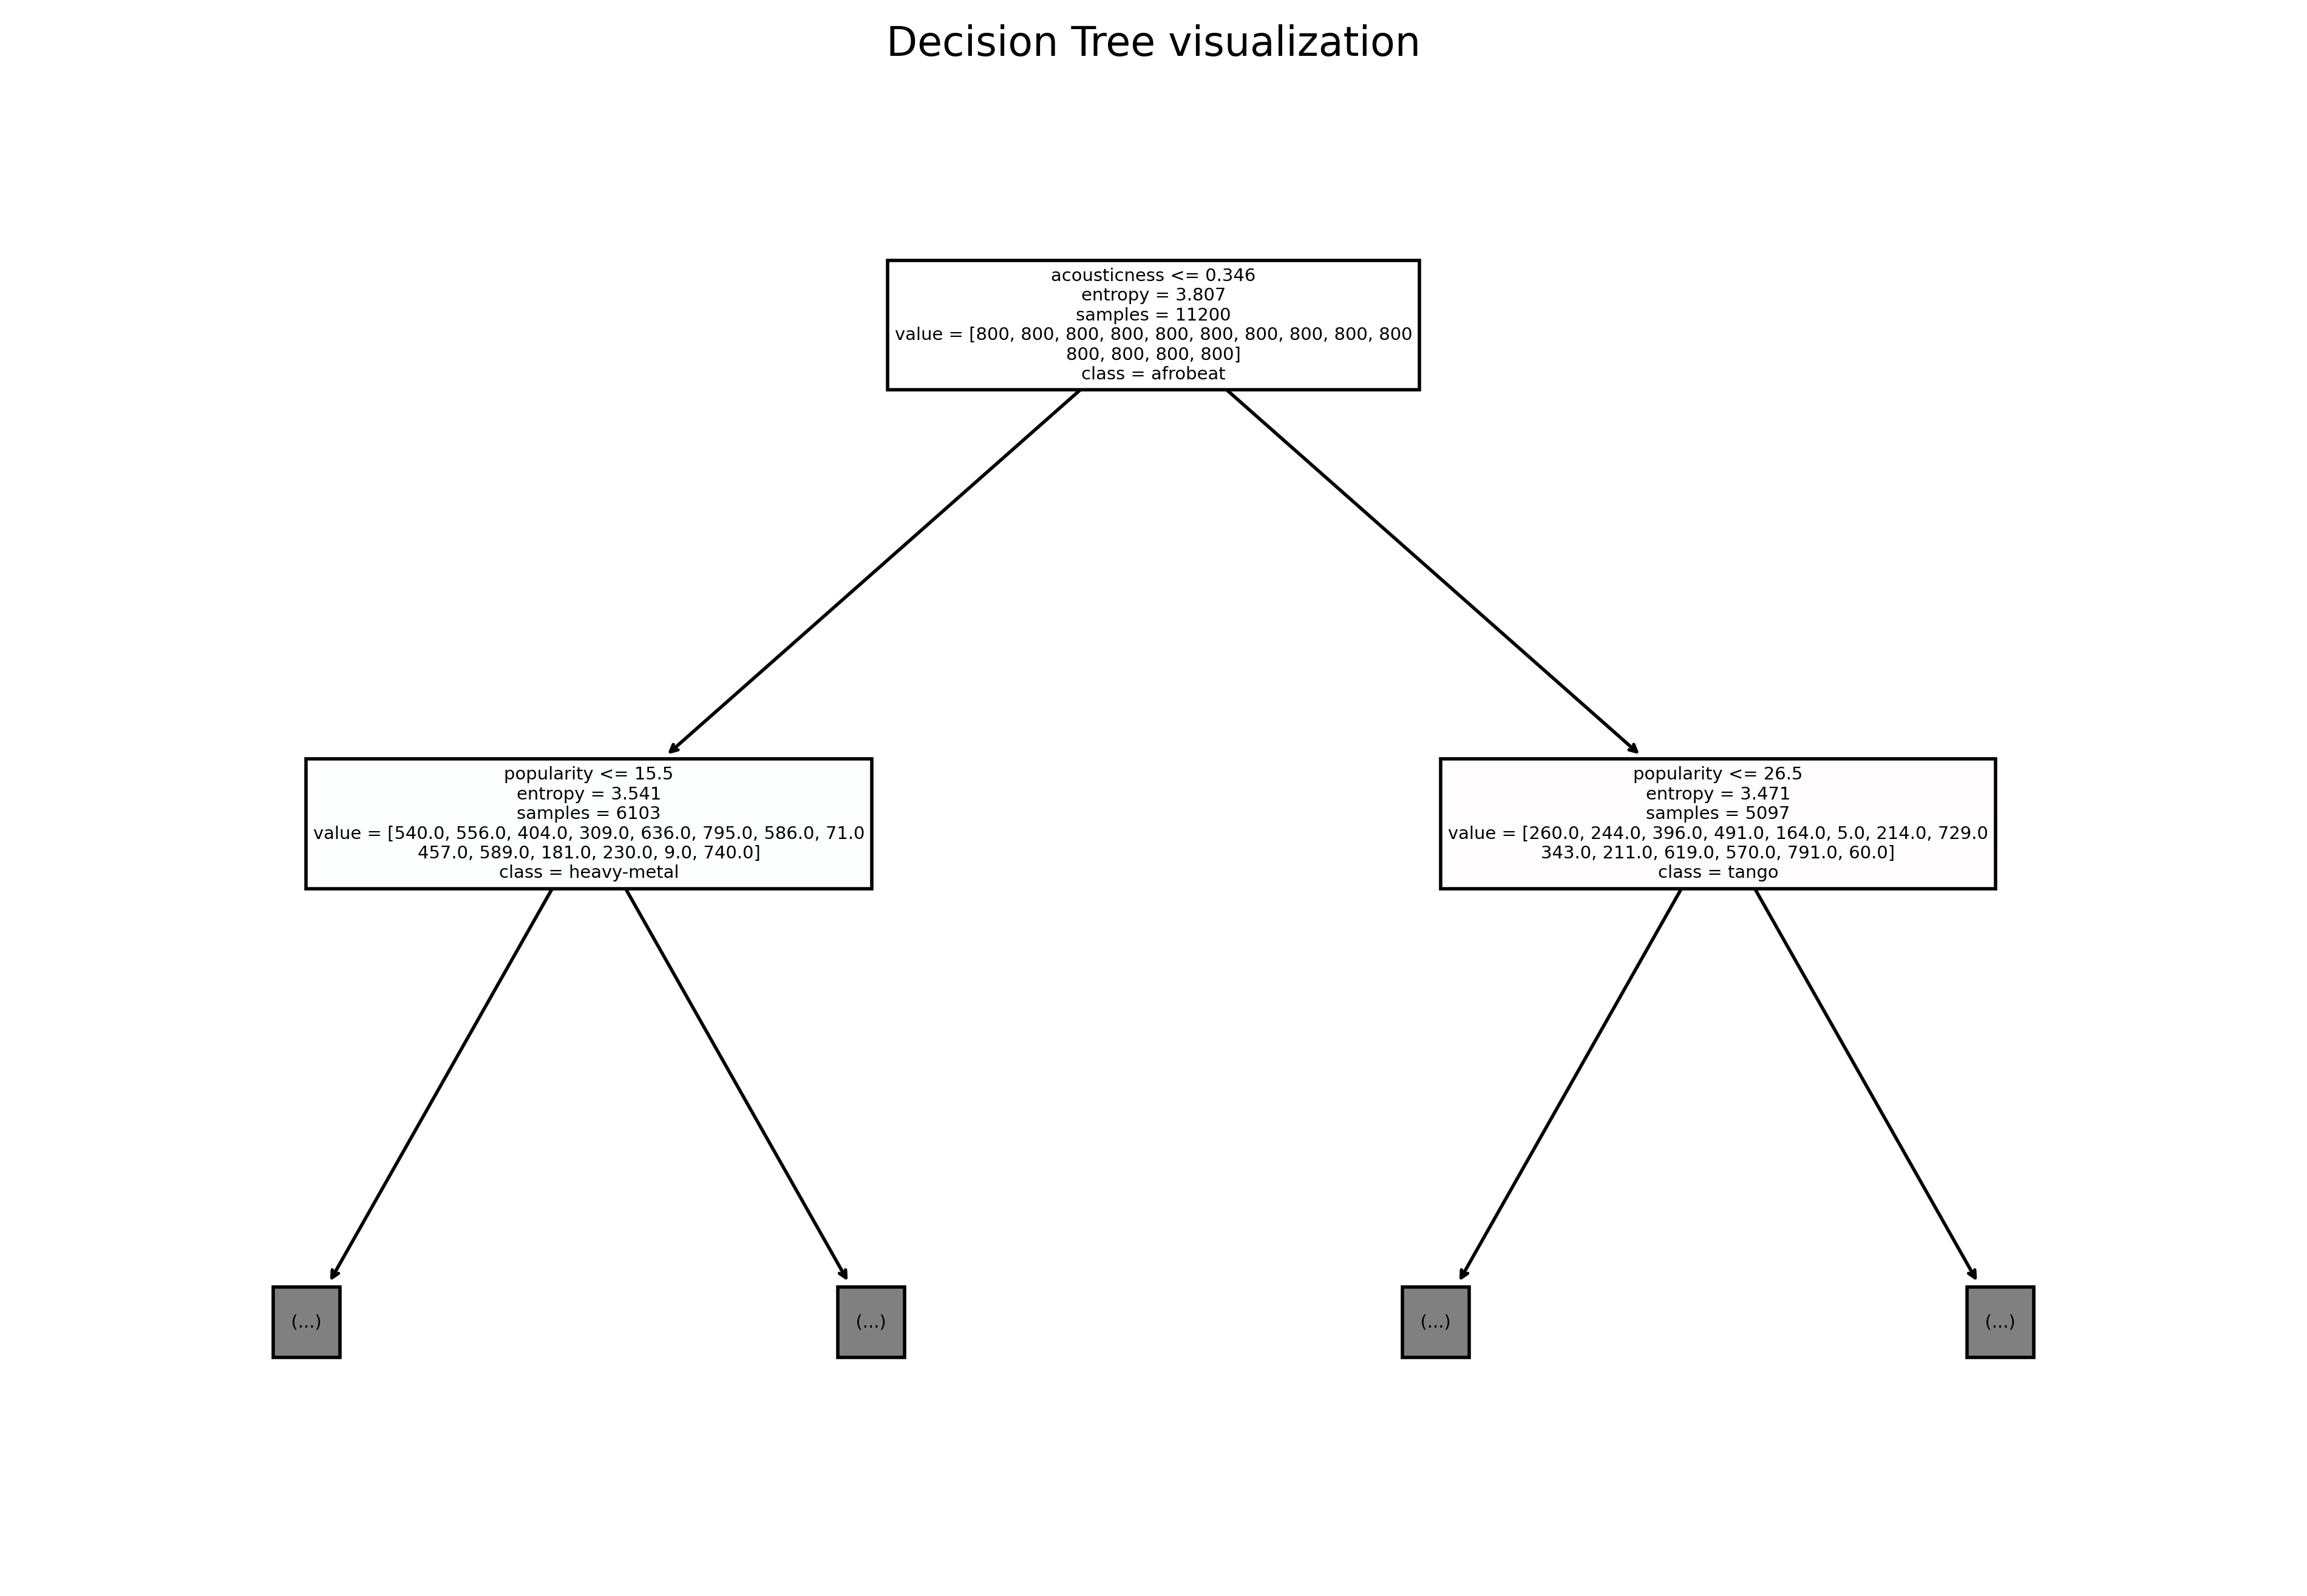

In [10]:

# get the feature and class names of the decision tree 
feature_names = x_train.columns
class_names = dt_classifier.classes_

# Get the properties of the root and children nodes
n_nodes = dt_classifier.tree_.node_count
children_left = dt_classifier.tree_.children_left
children_right = dt_classifier.tree_.children_right
feature = dt_classifier.tree_.feature
threshold = dt_classifier.tree_.threshold

# the information of root 
root = {
    'feature': feature_names[feature[0]],
    'threshold': threshold[0],
    'left_child': {
        'feature': feature_names[feature[children_left[0]]],
        'threshold': threshold[children_left[0]]
    },
    'right_child': {
        'feature': feature_names[feature[children_right[0]]],
        'threshold': threshold[children_right[0]]
    }
}

print(f"Root: {root['feature']} <= {root['threshold']}")
print(f"Left child of root: {root['left_child']['feature']} <= {root['left_child']['threshold']}")
print(f"Right child of root: {root['right_child']['feature']} <= {root['right_child']['threshold']}")

## print the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8), dpi=400)
plot_tree(dt_classifier, filled=True, feature_names=x_train.columns, class_names=dt_classifier.classes_, max_depth=1)
plt.title("Decision Tree visualization")
plt.show()

### Experiment 4

**C)** For the dataset utilized in Experiment 2, which includes all features, replicate the experiment with a Decision Tree classifier using a random state of `2024`. Employ the `Information Gain` as the criterion for splitting. **[0.5 Marks]**

In [179]:
## your code here

vectorizer = CountVectorizer()
#split three nominal features
nom_attri_2 = df['artists'] + ' ' + df['album_name'] + ' ' + df['track_name']
#transfer them to numeric 
nom_attri_2 = vectorizer.fit_transform(nom_attri_2)

# split rest numeric features
num_attri_2 = df[df.columns.difference(['artists', 'album_name', 'track_name','track_genre'])]

#merge two datasets
X = np.hstack([num_attri_2,nom_attri_2.toarray()])

y = df['track_genre']
# divide dataset to train and test 
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2, random_state=90049, shuffle=True, stratify=y)


dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=2024)

# fit the model, use the dataset processed in Q2
dt_classifier.fit(x_train_3, y_train_3)

# predict the result
y_pred = dt_classifier.predict(x_test_3)

# calculate the accuracy
DT_Acc_2 = accuracy_score(y_test_3, y_pred)
DT_Acc_2 = np.array(DT_Acc_2)

################

print("Accuracy of DT:", DT_Acc_2.round(3))


Accuracy of DT: 0.625


**D)** Perform Feature Selection strategically to maximize the accuracy of the Decision Tree classifier using a random state of `2024` and `Information Gain` as the splitting criterion. **[1 Marks]**

In [168]:
# your code here
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif


selector = SelectKBest(mutual_info_classif,k=1500)
x_train_3 = selector.fit_transform(x_train_2, y_train_2)
x_test_3 = selector.fit_transform(x_test_2)

# fit the model, use the dataset processed in Q2
dt_classifier.fit(x_train_3, y_train_2)


# predict the result
y_pred = dt_classifier.predict(x_test_3)

# calculate the accuracy
DT_Acc_3 = accuracy_score(y_test_2, y_pred)
DT_Acc_3 = np.array(DT_Acc_3)


###################

print("Accuracy of DT:", DT_Acc_2.round(3))


Accuracy of DT: 0.626


**E)** In your own words, explain why you think the modification you proposed in part **D** has improved the accuracy of your Decision Tree classifier. Provide ONE possible reason. **[0.5 marks]** (Limit your answer to maximum 200 words)

*Your Answer Here*

The **mutual information method** is capable of capturing **statistical dependencies**, which allows it to detect and eliminate features with statistical dependency. Therefore, it can prevent irrelevant features that do not provide useful information about the target from being included, thus reducing overfitting.The mutual information method is capable of capturing statistical dependencies, which allows it to detect and eliminate features with statistical dependency. Therefore, it can prevent irrelevant features that do not provide useful information about the target from being included, thus reducing overfitting.


## Question 4. Evaluation [7 marks]

**A)** For Decision Tree in Experiment 4 part C, visualize the Confusion Matrix using the `ConfusionMatrixDisplay` method and identify the `track_genre` with the lowest and highest True Positive (TP) values. **[0.5 Marks]** Provide a discussion on intutive reasons of disparities in the outcomes associated with different genres. **[0.5 Marks]** (Limit your answer to maximum 200-300 words)

*Your Answer Here*

The model excels in genres like **kids** and **heavy-metal**, likely due to their **distinctive features** that facilitate accurate classification, while it underperforms in genres like **folk** and **tango**, possibly due to their **similar features** with other feature that complicates differentiation.

Genre with highest TP: kids
Genre with lowest TP: folk


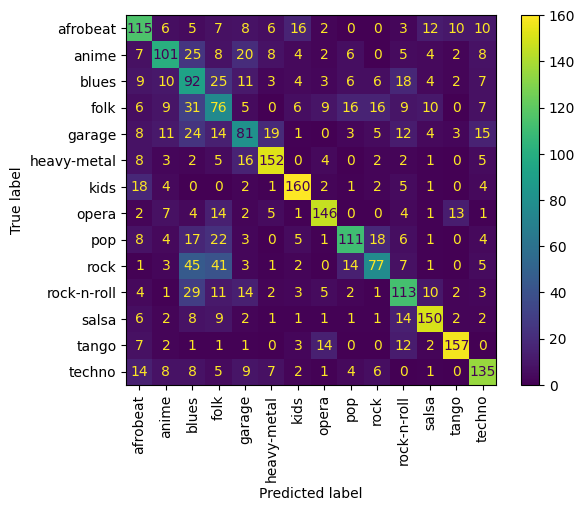

In [186]:
# ## your code here

dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=2024)

# fit the model, use the dataset processed in Q2
dt_classifier.fit(x_train_3, y_train_3)

# predict the result
y_pred = dt_classifier.predict(x_test_3)

#generate the confusion_matrix
cm = confusion_matrix(y_test_2, y_pred, labels=dt_classifier.classes_)

# find the lowest and highest True Positive (TP) values.
highest_TP = dt_classifier.classes_[cm.diagonal().argmax()]
lowest_TP = dt_classifier.classes_[cm.diagonal().argmin()]
print(f"Genre with highest TP: {highest_TP}")
print(f"Genre with lowest TP: {lowest_TP}")

#print the CM
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_classifier.classes_)
disp.plot(xticks_rotation='vertical')
plt.show()


**B)** In Experiment 2, part C, for both the Multinomial Naive Bayes and Gaussian Naive Bayes models, provide the following values: **[2 marks]**
- **1.** What is the probability that a track that is an "techno" genre is identified by the model as an "techno" genre?
- **2.** What is the probability that if a track is identified by the model as "techno", it is in fact a "techno" genre track?

In [189]:
## your code here

from sklearn.metrics import recall_score


vectorizer = CountVectorizer()
#split three nominal features
nom_attri_2 = df['artists'] + ' ' + df['album_name'] + ' ' + df['track_name']
#transfer them to numeric 
nom_attri_2 = vectorizer.fit_transform(nom_attri_2)

# split rest numeric features
num_attri_2 = df[df.columns.difference(['artists', 'album_name', 'track_name','track_genre'])]

#merge two datasets
X = np.hstack([num_attri_2,nom_attri_2.toarray()])

y = df['track_genre']
# divide dataset to train and test 
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=90049, shuffle=True, stratify=y)

## GNB
gnb = GaussianNB()
gnb.fit(x_train_2,y_train_2)
y_preds_gnb = gnb.predict(x_test_2)
p_score_gnb = precision_score(y_test_2, y_preds_gnb, labels=["techno"], average=None)
r_score_gnb = recall_score(y_test_2, y_preds_gnb, labels=["techno"], average=None)


print(f"techno GNB recall: {r_score_gnb}")
print(f"techno GNB precision: {p_score_gnb}")
print("\n")

# fix the issue of negative values
for col in range(15):
    if float(x_train_2[:, col].min()) < 0:
        x_train_2[:, col] = (x_train_2[:, col] - x_train_2[:, col].min()) / (x_train_2[:, col].max() - x_train_2[:, col].min())
   
## MBN
mnb = MultinomialNB()
mnb.fit(x_train_2, y_train_2)
y_pred_mnb = mnb.predict(x_test_2)
p_score_mnb = precision_score(y_test_2, y_pred_mnb, labels=["techno"], average=None)
r_score_mnb = recall_score(y_test_2, y_pred_mnb, labels=["techno"], average=None)

print(f"techno MNB recall: {r_score_mnb}")
print(f"techno MNB precision: {p_score_mnb}")

################

techno GNB recall: [0.485]
techno GNB precision: [0.51322751]


techno MNB recall: [0.755]
techno MNB precision: [0.26215278]


**C)** Comment on different behaviour of GNB and MNB for predicting 'techno' genre? **[1.5 marks]** Which model is performing better for this feature. Justify your answer.  **[1 mark]** (Limit your answer to maximum 200-300 words)

*Your Answer Here*

**GNB is better**

Because GNB has **similiar scores** in recall(0.485) and precision(0.51).

MNB achieved higher score in recal(0.755), while its precision is only (0.262).

Therefore, GNB achieved a better **balance between precision and recall scores**. There were fewer instances misclassified as "techno", and a competitive precision score ensured that instances classified as "techno" were more likely to be correct.

**D)** For your Decision Tree in expeiment 3 part C, report the following values: **[0.5 marks]**
- What is the probability that a track that is an "techno" genre is identified by the model as an "techno" genre?
- What is the probability that if a track is identified by the model as "techno", it is in fact a "techno" genre track?

In [191]:
# your code here
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=2024)
# fit the model, use the dataset processed in Q2
dt_classifier.fit(x_train_3, y_train_3)
# predict the result
y_pred = dt_classifier.predict(x_test_3)

p_score_dt = precision_score(y_test_3, y_pred, labels=["techno"], average=None)
r_score_dt = recall_score(y_test_3, y_pred, labels=["techno"], average=None)

print(f"techno DT recall: {r_score_dt}")
print(f"techno DT precision: {p_score_dt}")

################

techno DT recall: [0.675]
techno DT precision: [0.65533981]


**E)** Name one of the benefit of using your Decision Tree in compare with the two Naive Bayes models you have implemented for this dataset? Connect this benefit to your obseravtions in this dataset.  **[1 mark]** (Limit your answer to maximum 200-300 words)

*Your Answer Here* 

Decision Tree is better.

In this dataset, features only occur few times in this dataset. Due to this **sparsity of most features**, especially text features, decision trees may deal with this sparsity more effectively than naive Bayes models. Naive Bayesian models rely on the **statistical distribution** of features and are based on conditional independence assumptions, which often do not hold in this dataset. 

For example, in this dataset, there is a significant association between the two features of "explicit" and "speechiness" which violates **the Naive Bayes model's assumption of conditional independence**. **Decision trees, by contrast, do not rely on such assumptions and adapt to the specific structure of the data by splitting features**, so they are better able to capture the interactions between features, especially when faced with data sets with complex feature interrelationships. This ability makes decision trees more advantageous when dealing with data sets with many interdependent features, and can more accurately reflect the actual relationships between features, which may improve the classification performance of the model.

# Authorship Declaration:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: `Bichuan Liu 1520175`
   
   <b>Dated</b>: `2/April 2024`